In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import re

In [3]:
import matplotlib.dates as mdates

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.metrics import MeanAbsoluteError, RootMeanSquaredError

/Users/henriquerodrigues/Library/Python/3.8/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [5]:
data = pd.read_csv("/Users/henriquerodrigues/Desktop/LSE/DS_Project/NewsSentiment.csv")

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20915 entries, 0 to 20914
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE         20915 non-null  object 
 1   OUTLET       20914 non-null  object 
 2   AUTHOR       16885 non-null  object 
 3   DESCRIPTION  730 non-null    object 
 4   TEXT         20914 non-null  object 
 5   SENTIMENT    20729 non-null  float64
dtypes: float64(1), object(5)
memory usage: 980.5+ KB


In [7]:
na_data = data[data["SENTIMENT"].isna()]

In [8]:
na_data

,DATE,OUTLET,AUTHOR,DESCRIPTION,TEXT,SENTIMENT
74,12-11-2023,bing,CNBC Africa,Starlink is SpaceX’s answer to providing globa...,Get the best of CNBC Africa sent straight to y...,NaN
90,10-11-2023,bing,Investing on MSN,"The analysts assume that Tesla’s businesses, i...","The analysts assume that Tesla’s businesses, i...",NaN
199,01-04-2022,google,sec,"Apr 13, 2022 ... /s/ Elon Musk. Elon Musk. Exh...","To allow for equitable access to all users, SE...",NaN
202,01-04-2022,google,goodreads,Read 12k reviews from the world's largest comm...,"392 pages, Hardcover First published March 3, ...",NaN
204,01-04-2022,google,nytimes,"Apr 5, 2022 ... The Tesla chief executive, who...",Please enable JS and disable any ad blocker,NaN
...,...,...,...,...,...,...
20474,12-05-2023,washington post,By Fareed Zakaria,NaN,\nA comparison of suicides is equally depressi...,NaN
20743,28-08-2023,washington post,By Cat Zakrzewski,NaN,\nSchumer (D-N.Y.) earlier this summer teased ...,NaN
20759,06-09-2023,washington post,By Cat Zakrzewski,NaN,\nHis office on Wednesday exclusively told The...,NaN
20838,02-10-2023,washington post,By,NaN,\nThe guardrails in AI don't work — so far. If...,NaN


In [9]:
data = data.dropna(subset=["TEXT", "SENTIMENT"])

In [10]:
def filter(text):
    sentences = re.split(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s', text)
    keywords = ['elon', 'musk', 'x', 'twitter']

    filtered_sentences = [sentence for sentence in sentences if any(keyword in sentence.lower() for keyword in keywords)]
    concatenated_text = ' '.join(filtered_sentences)
    
    return concatenated_text

data['TEXT'] = data['TEXT'].apply(lambda x: filter(x))

In [11]:
data["DATE"] = pd.to_datetime(data["DATE"], format="%d-%m-%Y")
data = data[data['DATE'] >= '2022-01-01']

In [12]:
data["SENTIMENT"].describe()

count    20728.000000
mean        -0.053817
std          0.357051
min         -0.998854
25%         -0.194415
50%         -0.001214
75%          0.031086
max          0.999728
Name: SENTIMENT, dtype: float64

In [13]:
data["SENTIMENT"].info()

<class 'pandas.core.series.Series'>
Index: 20728 entries, 0 to 20914
Series name: SENTIMENT
Non-Null Count  Dtype  
--------------  -----  
20728 non-null  float64
dtypes: float64(1)
memory usage: 323.9 KB


In [14]:
data["TEXT"].info()

<class 'pandas.core.series.Series'>
Index: 20728 entries, 0 to 20914
Series name: TEXT
Non-Null Count  Dtype 
--------------  ----- 
20728 non-null  object
dtypes: object(1)
memory usage: 323.9+ KB


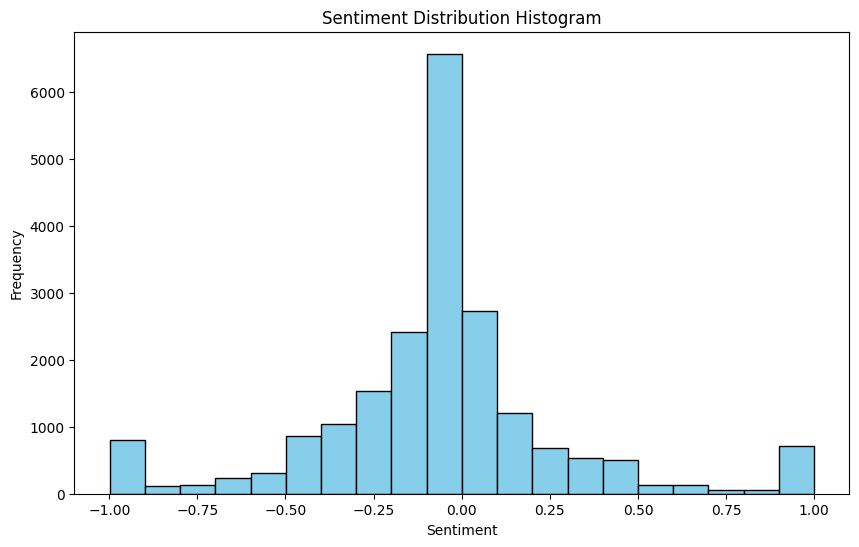

In [15]:
plt.figure(figsize=(10, 6))
plt.hist(data["SENTIMENT"], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Sentiment Distribution Histogram')
plt.show()

In [16]:
data = data.sample(frac=1).reset_index(drop=True)

In [17]:
train_data = data.head(int(len(data) * 0.2))
test_data = data.tail(len(data)-int(len(data) * 0.2))

In [18]:
# Assuming 'X' contains preprocessed article text and 'y' contains corresponding labels
X=train_data["TEXT"]
y=train_data["SENTIMENT"]

# Splitting dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Feature extraction using TF-IDF
X_train_texts = X_train.squeeze().tolist()
X_test_texts = X_test.squeeze().tolist()

tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_texts)
X_test_tfidf = tfidf_vectorizer.transform(X_test_texts)

In [20]:
print("X_train_tfidf shape:", X_train_tfidf.shape)
print("X_test_tfidf shape:", X_test_tfidf.shape)

# Convert sparse matrix to array for Keras
X_train_array = np.array(X_train_tfidf.toarray())
X_test_array = np.array(X_test_tfidf.toarray())

print("X_train_array shape:", X_train_array.shape)
print("X_test_array shape:", X_test_array.shape)

X_train_tfidf shape: (3316, 55390)
X_test_tfidf shape: (829, 55390)
X_train_array shape: (3316, 55390)
X_test_array shape: (829, 55390)


In [21]:
# Initializing Neural Network model
model = Sequential()
model.add(Dense(128, input_shape=(X_train_array.shape[1],), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='tanh'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               7090048   
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 7098369 (27.08 MB)
Trainable params: 7098369 (27.08 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
model.compile(optimizer="adam", loss='mean_squared_error', metrics=[MeanAbsoluteError(), RootMeanSquaredError()])
model.fit(X_train_array, y_train, epochs=5, batch_size=32, validation_split=0.1)

Epoch 1/5
94/94 [==============================] - 1s 10ms/step - loss: 0.1143 - mean_absolute_error: 0.2171 - root_mean_squared_error: 0.3382 - val_loss: 0.0998 - val_mean_absolute_error: 0.2017 - val_root_mean_squared_error: 0.3159
Epoch 2/5
94/94 [==============================] - 1s 9ms/step - loss: 0.0507 - mean_absolute_error: 0.1524 - root_mean_squared_error: 0.2251 - val_loss: 0.1017 - val_mean_absolute_error: 0.2207 - val_root_mean_squared_error: 0.3190
Epoch 3/5
94/94 [==============================] - 1s 9ms/step - loss: 0.0194 - mean_absolute_error: 0.1024 - root_mean_squared_error: 0.1391 - val_loss: 0.0962 - val_mean_absolute_error: 0.2045 - val_root_mean_squared_error: 0.3102
Epoch 4/5
94/94 [==============================] - 1s 9ms/step - loss: 0.0091 - mean_absolute_error: 0.0701 - root_mean_squared_error: 0.0954 - val_loss: 0.0982 - val_mean_absolute_error: 0.2090 - val_root_mean_squared_error: 0.3134
Epoch 5/5
94/94 [==============================] - 1s 10ms/step - l

In [24]:
loss, mae, rmse = model.evaluate(X_test_array, y_test)

26/26 [==============================] - 0s 3ms/step - loss: 0.0990 - mean_absolute_error: 0.2055 - root_mean_squared_error: 0.3147


In [25]:
y_pred= model.predict(X_test_array)

26/26 [==============================] - 0s 3ms/step


In [26]:
y_pred_flat = y_pred.flatten()
comparison_data = pd.DataFrame({'TEXT': X_test, 'TEST': y_test, 'PRED': np.round(y_pred_flat,2)})

In [27]:
comparison_data.describe()

,TEST,PRED
count,829.000000,829.000000
mean,-0.062358,-0.054970
std,0.341671,0.172315
min,-0.998766,-0.950000
25%,-0.200856,-0.130000
50%,-0.000393,-0.040000
75%,0.038213,0.050000
max,0.999679,0.610000


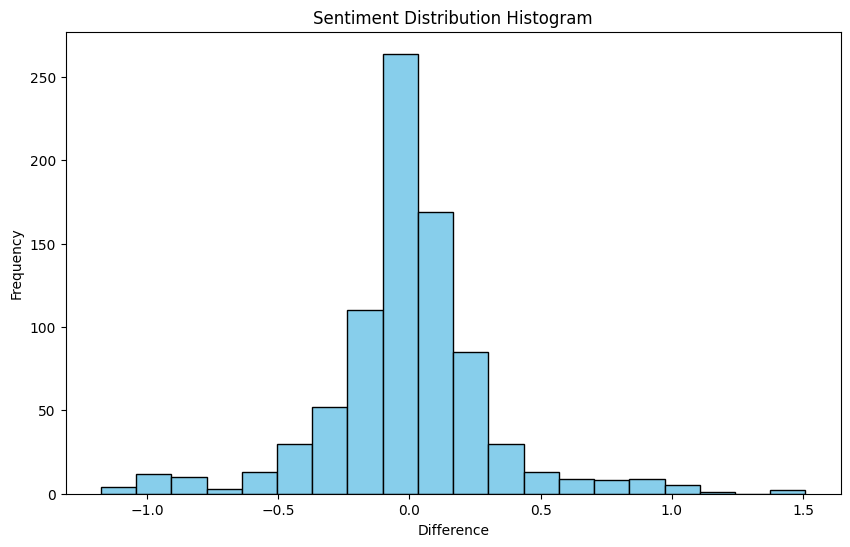

In [28]:
diff=y_test-y_pred_flat

plt.figure(figsize=(10, 6))
plt.hist(diff, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Difference')
plt.ylabel('Frequency')
plt.title('Sentiment Distribution Histogram')
plt.show()

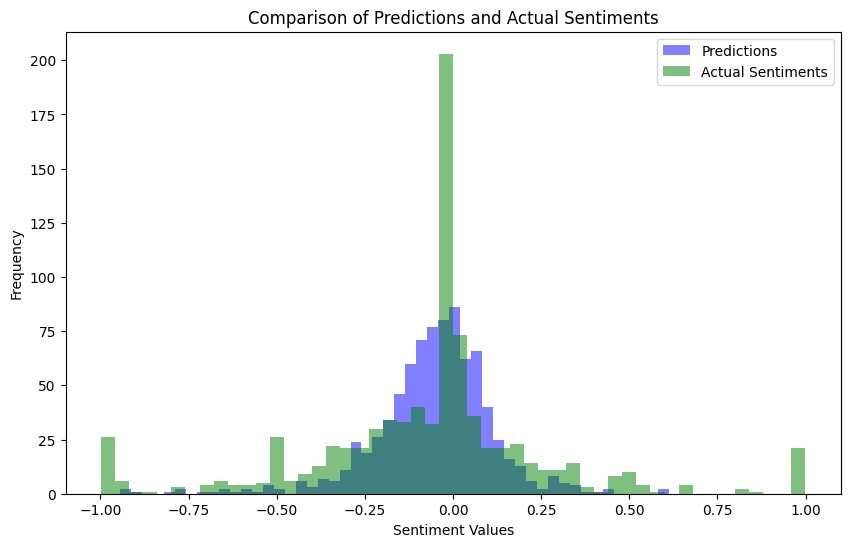

In [29]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(y_pred, bins=50, alpha=0.5, color='blue', label='Predictions')
plt.hist(y_test, bins=50, alpha=0.5, color='green', label='Actual Sentiments')
plt.title('Comparison of Predictions and Actual Sentiments')
plt.xlabel('Sentiment Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [30]:
X_test_texts = test_data["TEXT"].squeeze().tolist()

X_test_tfidf = tfidf_vectorizer.transform(X_test_texts)
X_test_array = np.array(X_test_tfidf.toarray())


test_data["SENTIMENT_PRED"] = model.predict(X_test_array)

519/519 [==============================] - 1s 3ms/step


/var/folders/4h/c_6klx0d0bd723smcqr1l_3h0000gn/T/ipykernel_57765/1682832686.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["SENTIMENT_PRED"] = model.predict(X_test_array)


In [58]:
y_test = test_data["SENTIMENT"]

In [59]:
loss, mae, rmse = model.evaluate(X_test_array, y_test)

519/519 [==============================] - 1s 3ms/step - loss: 0.1094 - mean_absolute_error: 0.2135 - root_mean_squared_error: 0.3308


In [31]:
test_data[["SENTIMENT", "SENTIMENT_PRED"]]

,SENTIMENT,SENTIMENT_PRED
4145,-0.000594,-0.031623
4146,-0.067206,-0.103024
4147,-0.995197,0.087753
4148,0.000205,-0.189445
4149,-0.066590,-0.025029
...,...,...
20723,-0.985290,0.012141
20724,0.367315,0.102743
20725,0.118175,-0.117064
20726,-0.000013,-0.154768


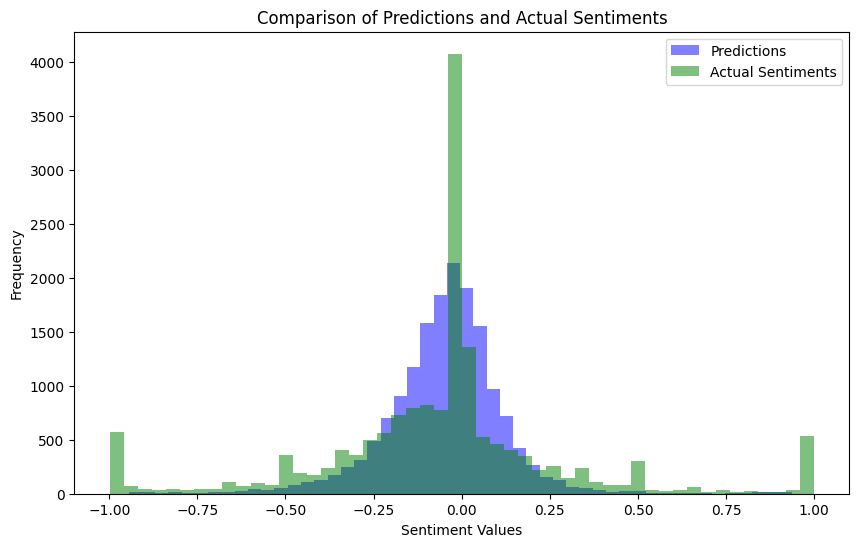

In [32]:
plt.figure(figsize=(10, 6))
plt.hist(test_data["SENTIMENT_PRED"], bins=50, alpha=0.5, color='blue', label='Predictions')
plt.hist(test_data["SENTIMENT"], bins=50, alpha=0.5, color='green', label='Actual Sentiments')
plt.title('Comparison of Predictions and Actual Sentiments')
plt.xlabel('Sentiment Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()

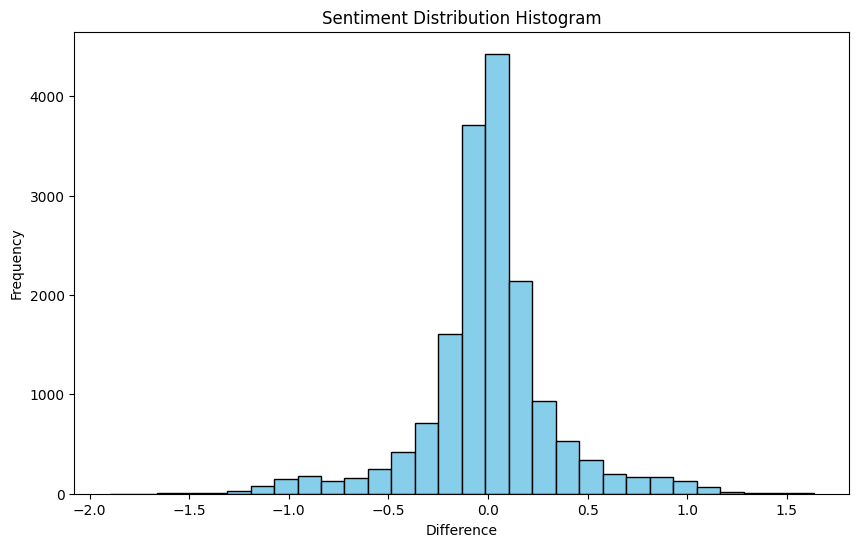

In [33]:
diff=test_data["SENTIMENT_PRED"]-test_data["SENTIMENT"]

plt.figure(figsize=(10, 6))
plt.hist(diff, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Difference')
plt.ylabel('Frequency')
plt.title('Sentiment Distribution Histogram')
plt.show()

In [34]:
train_data["SENTIMENT_PRED"] = train_data["SENTIMENT"]
data = pd.concat([train_data, test_data], ignore_index=True)

/var/folders/4h/c_6klx0d0bd723smcqr1l_3h0000gn/T/ipykernel_57765/1299715006.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["SENTIMENT_PRED"] = train_data["SENTIMENT"]


In [35]:
data

,DATE,OUTLET,AUTHOR,DESCRIPTION,TEXT,SENTIMENT,SENTIMENT_PRED
0,2022-03-28,WSJ,"Robert McMillan, Kevin Poulsen",NaN,In a secret chat room run by a group of Russia...,0.000026,0.000026
1,2022-04-14,business insider,kduffy@insider.com (Kate Duffy),NaN,* Jack Sweeney runs a Twitter account that pos...,-0.148219,-0.148219
2,2022-04-21,washington post,By Cristiano LimaAaron Schaffer,NaN,"\n""We have some concerns coming out of the mee...",-0.158408,-0.158408
3,2022-11-18,NYT,Paul Krugman,NaN,The story so far: Crypto reached its peak of p...,-0.132087,-0.132087
4,2023-07-18,barrons,Al Root,NaN,Elon Musk's SpaceX[https://www-barrons-com.gat...,0.144206,0.144206
...,...,...,...,...,...,...,...
20723,2023-04-18,NYT,Mike Isaac,NaN,Those companies are using Reddit’s conversatio...,-0.985290,0.012141
20724,2022-01-28,WSJ,Rebecca Elliott,NaN,Elon Musk is betting that he can turn Tesla In...,0.367315,0.102743
20725,2022-10-07,business insider,gkay@insider.com (Grace Kay),NaN,\n* A coordinator for Starlink donations said ...,0.118175,-0.117064
20726,2023-06-13,NYT,Cecilia Kang,NaN,"The chief executive of OpenAI, which makes Cha...",-0.000013,-0.154768


In [38]:
average_sentiment_day = data.groupby(data["DATE"].dt.to_period("D"))["SENTIMENT"].mean().reset_index()
average_sentiment_pred_day = data.groupby(data["DATE"].dt.to_period("D"))["SENTIMENT_PRED"].mean().reset_index()

average_sentiment_day["DATE"] = average_sentiment_day["DATE"].astype(str)
average_sentiment_pred_day["DATE"] = average_sentiment_pred_day["DATE"].astype(str)

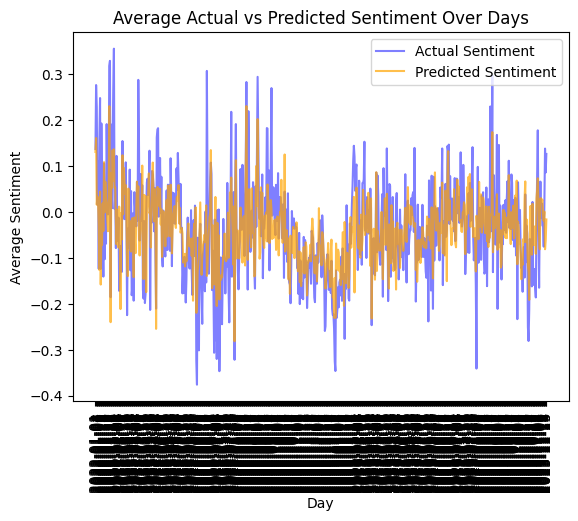

In [40]:
plt.plot(average_sentiment_day["DATE"], average_sentiment_day["SENTIMENT"], label="Actual Sentiment", color='blue', alpha=0.5)
plt.plot(average_sentiment_pred_day["DATE"], average_sentiment_pred_day["SENTIMENT_PRED"], label="Predicted Sentiment", color='orange', alpha=0.7)

plt.xlabel("Day")
plt.ylabel("Average Sentiment")
plt.title("Average Actual vs Predicted Sentiment Over Days")

plt.xticks(rotation='vertical')
plt.legend()

plt.show()

In [41]:
average_sentiment_week = data.groupby(data["DATE"].dt.to_period("W"))["SENTIMENT"].mean().reset_index()
average_sentiment_pred_week = data.groupby(data["DATE"].dt.to_period("W"))["SENTIMENT_PRED"].mean().reset_index()

average_sentiment_week["DATE"] = average_sentiment_week["DATE"].astype(str)
average_sentiment_pred_week["DATE"] = average_sentiment_pred_week["DATE"].astype(str)

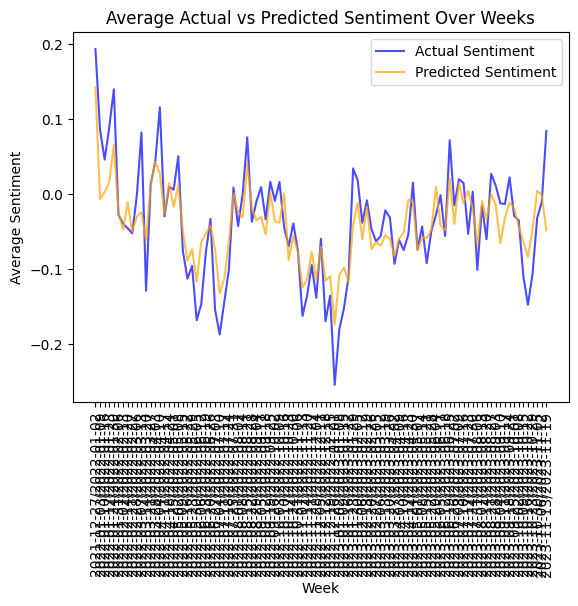

In [42]:
plt.plot(average_sentiment_week["DATE"], average_sentiment_week["SENTIMENT"], label="Actual Sentiment", color='blue', alpha=0.7)
plt.plot(average_sentiment_pred_week["DATE"], average_sentiment_pred_week["SENTIMENT_PRED"], label="Predicted Sentiment", color='orange', alpha=0.7)

plt.xlabel("Week")
plt.ylabel("Average Sentiment")
plt.title("Average Actual vs Predicted Sentiment Over Weeks")

plt.xticks(rotation='vertical')
plt.legend()

plt.show()

In [44]:
average_sentiment_month = data.groupby(data["DATE"].dt.to_period("M"))["SENTIMENT"].mean().reset_index()
average_sentiment_pred_month = data.groupby(data["DATE"].dt.to_period("M"))["SENTIMENT_PRED"].mean().reset_index()

average_sentiment_month["DATE"] = average_sentiment_month["DATE"].astype(str)
average_sentiment_pred_month["DATE"] = average_sentiment_pred_month["DATE"].astype(str)

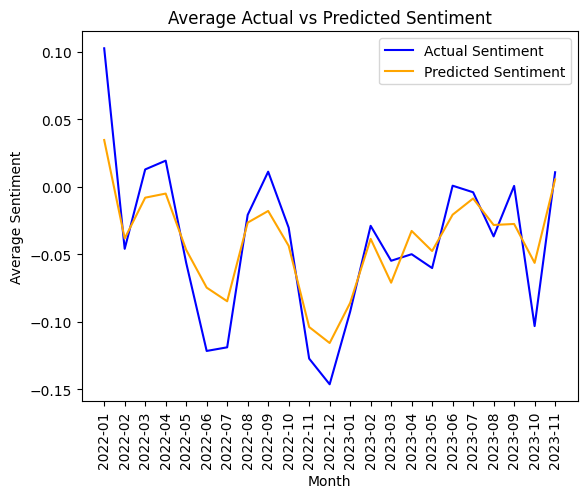

In [45]:
plt.plot(average_sentiment_month["DATE"], average_sentiment_month["SENTIMENT"], label="Actual Sentiment", color='blue')
plt.plot(average_sentiment_pred_month["DATE"], average_sentiment_pred_month["SENTIMENT_PRED"], label="Predicted Sentiment", color='orange')

plt.xlabel("Month")
plt.ylabel("Average Sentiment")
plt.title("Average Actual vs Predicted Sentiment")

plt.xticks(rotation='vertical')
plt.legend()

plt.show()

In [53]:
d = {'DATE': average_sentiment_day["DATE"],
        'SENTIMENT': average_sentiment_day["SENTIMENT"],
        'SENTIMENT_PRED': average_sentiment_pred_day["SENTIMENT_PRED"]}

day = pd.DataFrame(d)
day.to_csv('day_av.csv', index=False)

In [55]:
w = {'DATE': average_sentiment_week["DATE"],
        'SENTIMENT': average_sentiment_week["SENTIMENT"],
        'SENTIMENT_PRED': average_sentiment_pred_week["SENTIMENT_PRED"]}

week = pd.DataFrame(w)
week.to_csv('week_av.csv', index=False)

In [56]:
m = {'DATE': average_sentiment_month["DATE"],
        'SENTIMENT': average_sentiment_month["SENTIMENT"],
        'SENTIMENT_PRED': average_sentiment_pred_month["SENTIMENT_PRED"]}

month = pd.DataFrame(m)
month.to_csv('month_av.csv', index=False)